<a href="https://colab.research.google.com/github/LIvanoff/dashboard-test/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as sts
from scipy.stats import ttest_ind, mannwhitneyu

Перед работой с данным CSV файлом у него была изменена кодировка на UTF-8

In [ ]:
df = pd.read_csv('/content/М.Тех_Данные_к_ТЗ_DS.csv', sep=",")
df

,"Количество больничных дней,""Возраст"",""Пол"""
0,"5,39,""Ж"""
1,"4,54,""М"""
2,"4,26,""М"""
3,"5,42,""М"""
4,"4,29,""М"""
...,...
232,"5,30,""М"""
233,"4,36,""Ж"""
234,"2,60,""Ж"""
235,"2,44,""Ж"""


Приведём датафрейм к удобному формату, сделва для каждого признака свой столбец, также поменяем их имена, а также поменяем тип данных с object на int

In [ ]:
names= df.columns.str.split(',')
names

Index([['Количество больничных дней', '"Возраст"', '"Пол"']], dtype='object')

In [ ]:
df= df.iloc[:,0].str.split(',', expand=True)
df

,0,1,2
0,5,39,"""Ж"""
1,4,54,"""М"""
2,4,26,"""М"""
3,5,42,"""М"""
4,4,29,"""М"""
...,...,...,...
232,5,30,"""М"""
233,4,36,"""Ж"""
234,2,60,"""Ж"""
235,2,44,"""Ж"""


In [ ]:
df.columns = names[0]
df

,Количество больничных дней,"""Возраст""","""Пол"""
0,5,39,"""Ж"""
1,4,54,"""М"""
2,4,26,"""М"""
3,5,42,"""М"""
4,4,29,"""М"""
...,...,...,...
232,5,30,"""М"""
233,4,36,"""Ж"""
234,2,60,"""Ж"""
235,2,44,"""Ж"""


In [ ]:
df = df.rename(columns={'"Возраст"': 'age', '"Пол"': 'sex', 'Количество больничных дней': 'work_days'})

In [ ]:
df['age'] = df['age'].astype(str).astype(int)
df['work_days'] = df['work_days'].astype(str).astype(int)

Приведём категориальный признак sex (Пол) к численному виду, поменяв М на 1, Ж на 0

In [ ]:
df['sex'].unique()

array(['"Ж"', '"М"'], dtype=object)

In [ ]:
for i in range(len(df['sex'])):
  if df.loc[i, 'sex'] == '"Ж"':
    df.loc[i, 'sex'] = 0
  else:
    df.loc[i, 'sex'] = 1

df['sex'] = df['sex'].astype(str).astype(int)
df

,work_days,age,sex
0,5,39,0
1,4,54,1
2,4,26,1
3,5,42,1
4,4,29,1
...,...,...,...
232,5,30,1
233,4,36,0
234,2,60,0
235,2,44,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   work_days  237 non-null    int64
 1   age        237 non-null    int64
 2   sex        237 non-null    int64
dtypes: int64(3)
memory usage: 5.7 KB


## Гипотеза 1

Проверим первую гипотезу "*Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщиню*"

Для начала сформируем нужную нам выборку взяв всех работников у кого пропущенно более двух дней

In [ ]:
work_days = 2

In [ ]:
h1 = df[df['work_days'] > work_days]
h1

,work_days,age,sex
0,5,39,0
1,4,54,1
2,4,26,1
3,5,42,1
4,4,29,1
...,...,...,...
229,5,33,1
230,4,36,0
232,5,30,1
233,4,36,0


Сравним количество женщин и мужчин в нашей выборке

In [ ]:
h1.sex.value_counts()

1    84
0    67
Name: sex, dtype: int64

Как можно видеть мужчин чуть больше, чем женщин, их процент составляет 55%

Посмотрим графики рассеяения

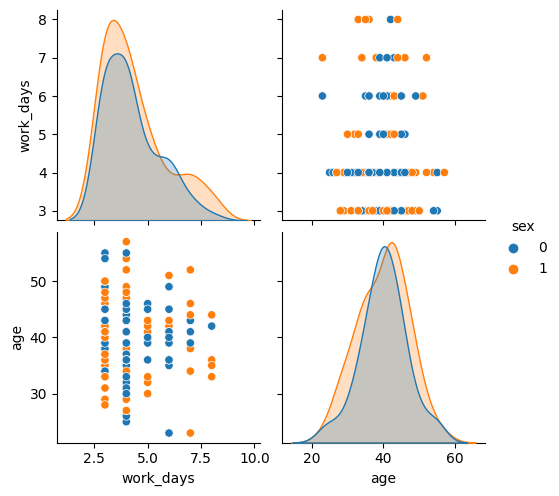

In [ ]:
sns.pairplot(h1, hue='sex')

Чисто визуально на диаграмме рассеяния не наблюдается какая-либо разницы между кол-вом пропущенных дней мужчинами и женщинами

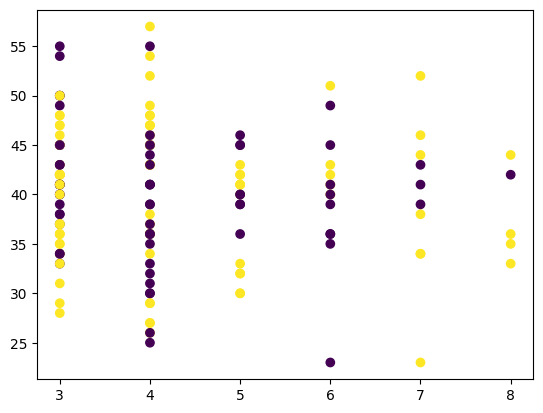

In [ ]:
plt.scatter(x=h1['work_days'], y=h1['age'], c=list(h1['sex']))

На следующей гистограмме можно видеть большее число подсчитанных пропущенных дней за мужчинами, данный момент обеспечивается изначальной диспропорцией классов.

In [ ]:
px.histogram(h1,
             x = 'work_days',
             color = 'sex',
             barmode = 'group',
             text_auto = True
             )

Посмотрим на корреляцию.
Как можно видеть по данному изображению, число пропущенных дней (work_days) от пола (sex) не имеет никакой корреляции.

<Axes: >

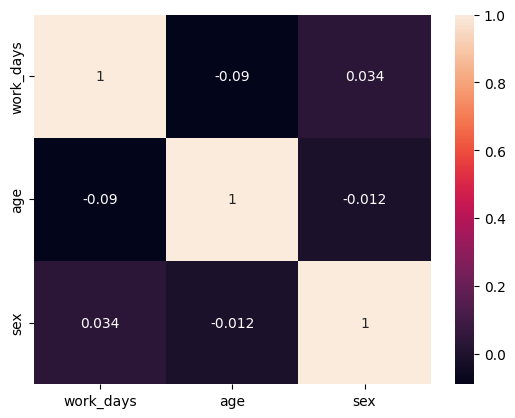

In [ ]:
sns.heatmap(h1.corr(), annot=True)

Проверим нашу гипотезу, сравнив распределения пропущенных дней мужчинами и женщинами, для чего далее разделим нашу выборку на две: male и female.

In [ ]:
male = h1.work_days[h1.sex == 1]
female = h1.work_days[h1.sex == 0]

Cравним дисперсии распределений при помощи дисперсионного анализа Anova.

In [ ]:
_, pvalue = sts.f_oneway(male, female)

In [ ]:
pvalue

0.9035672453877719

Итак мы получили уровень значимости куда больший, чем 0.05, поэтому у нас нет оснований отвергнуть нулевую гипотезу, наша экспериментальная (Альтернативная) гипотеза не доказана.

Также для большей уверенности сравним среднии распределений при помощи теста Стьюдента

In [ ]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(male, female)
print(f"t-test: statistic={stat:.4f}, p-value={p_value}")

t-test: statistic=0.4159, p-value=0.67806332103283


В данном тесте мы также получили уровень значимости больший чем 0.05

## Гипотеза 2

Теперь проверим вторую гипотезу "*Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.*"

In [ ]:
age = 35

Составим две подвыборки разделив изначальную установив порог в возрасте 35.

In [ ]:
old = h1[h1['age'] > age]
young = h1[h1['age'] <= age]

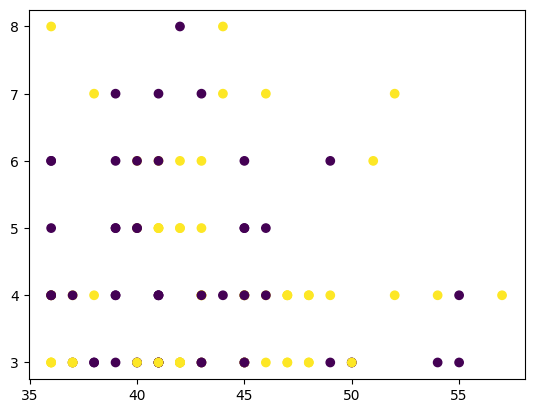

In [ ]:
scatter = plt.scatter(x=old['age'], y=old['work_days'], c=list(old['sex']))
# plt.legend(*scatter.legend_elements())
# plt.show()

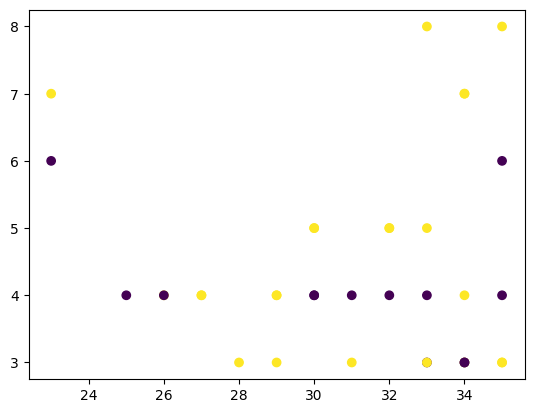

In [ ]:
plt.scatter(x=young['age'], y=young['work_days'], c=list(young['sex']))

Сравним визуально распределения количества пропущенных для обеих выборок

<Axes: >

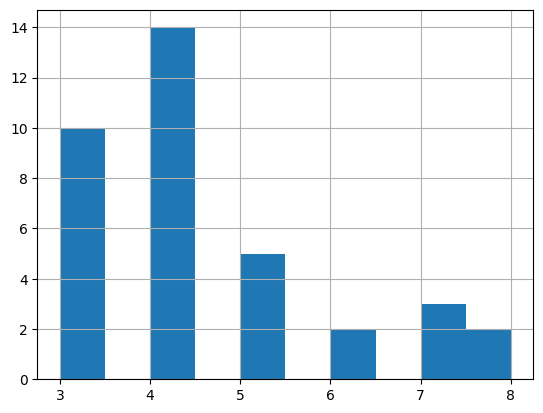

In [ ]:
young.work_days.hist()

<Axes: >

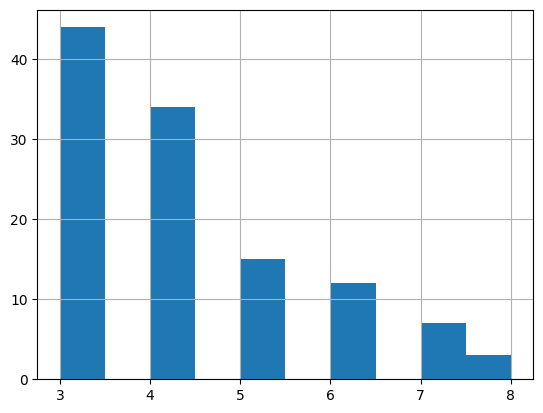

In [ ]:
old.work_days.hist()

Обе выборке имеют похожие распределения, но есть разница в количестве работников пропустивших 3 дня

Сравним распределения с помощью графика с усами.

{'whiskers': [<matplotlib.lines.Line2D at 0x7b8c2f56eb30>,
 'caps': [<matplotlib.lines.Line2D at 0x7b8c2f56e4a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b8c2f56eda0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b8c2f56e140>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b8c2f56df00>],
 'means': []}

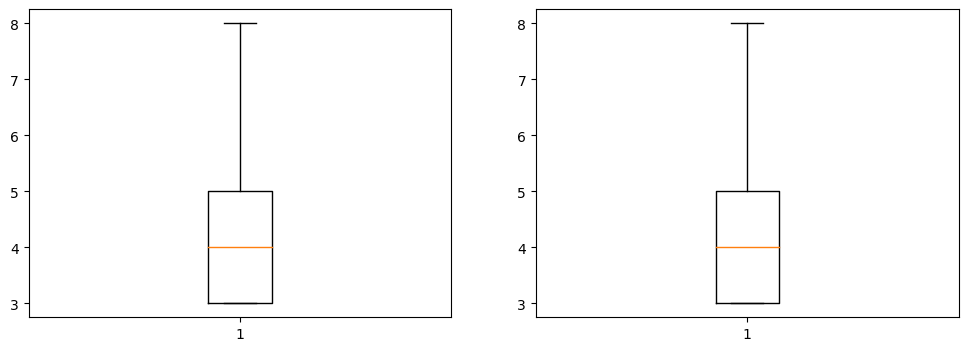

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].boxplot(old.work_days)
ax[1].boxplot(young.work_days)

По данному графику можно сказать о схожести распределений наших выборок.

Стоит отметить наши выборки не равны, поэтому увеличим выборку, чтобы не ошибиться на тестах зависящах от сбалансированности выборок.

In [ ]:
def upsample(sample, n_trials, statistic=np.median):
    rng = np.random.default_rng()
    upsample = []

    while len(upsample) < n_trials:
        boot_sample = rng.choice(sample, size=1, replace=True)
        upsample.append(boot_sample)
    return np.array(upsample)

In [ ]:
young_upsample = upsample(young.work_days, old.shape[0]).reshape(-1,)
young_upsample.shape

(115,)

Сравним полученную выборку и изначальную

In [ ]:
sts.f_oneway(young_upsample, young.work_days)

F_onewayResult(statistic=0.46011300289213736, pvalue=0.4986232684790821)

Данный результат позволяет нам не отвергнуть гипотезу о схожести распределений выборок.
Теперь сравним наши выборки с работниками до 35 лет с выборкой, состоящей из работников от 35 лет.

In [ ]:
sts.f_oneway(old.work_days, young.work_days)

F_onewayResult(statistic=0.5767412881130654, pvalue=0.44879229579719326)

In [ ]:
sts.f_oneway(old.work_days, young_upsample)

F_onewayResult(statistic=0.021876332622601278, pvalue=0.8825472772760652)

Итак в обоих случаях мы получили не отвергаем изначальную гипотезу о схожести дисперсий выборок.
Проведём ещё несколько тестов.

In [ ]:
stat, p_value = ttest_ind(old.work_days, young.work_days)
print(f"old vs young: p-value={p_value}")

stat, p_value = ttest_ind(old.work_days, young_upsample)
print(f"old vs young_bootstrap: p-value={p_value}")

old vs young: p-value=0.4487922957971878
old vs young_bootstrap: p-value=0.8825472772761002


In [ ]:
stat, p_value = mannwhitneyu(old.work_days, young.work_days)
print(f"old vs young: p-value={p_value:.4f}")
stat, p_value = mannwhitneyu(old.work_days, young_upsample)
print(f"old vs young_bootstrap: p-value={p_value:.4f}")

old vs young: p-value=0.4083
old vs young_bootstrap: p-value=0.6893


Итак тут мы тоже получили значения выше уровня уровня значимости, что позволяет нам оставить нулевую гипотезу о схожести распределений. Наша альтернативная гипотеза не доказана.